## Introduction
Three data sets are submitted, for training and testing. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.

### Data Dictionary

|Feature|Description|
|:------|:----------|
|date| time year-month-day hour:minute:second|
|Temperature| in Celsius|
|Relative Humidity| %|
|Light| in Lux|
|CO2| in ppm|
|Humidity Ratio| Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air|
|Occupancy| 0 or 1, 0 for not occupied, 1 for occupied status|



In [118]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing ML libs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

In [119]:
# loading in the data
df1 = pd.read_csv('datatraining.txt').set_index('date')
df2 = pd.read_csv('datatest.txt').set_index('date')
df3 = pd.read_csv('datatest2.txt').set_index('date')

In [120]:
df1

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...
2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1


In [121]:
df2

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1


In [122]:
df3

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...
2015-02-18 09:15:00,20.8150,27.717500,429.750000,1505.250000,0.004213,1
2015-02-18 09:16:00,20.8650,27.745000,423.500000,1514.500000,0.004230,1
2015-02-18 09:16:59,20.8900,27.745000,423.500000,1521.500000,0.004237,1


In [123]:
df1.index = pd.to_datetime(df1.index)
df2.index = pd.to_datetime(df2.index)
df3.index = pd.to_datetime(df3.index)

The splits among the dataframes might be made for training, validation, and test sets. Even if they weren't, they could still be used for the purposes mentioned. I'd still combine all the pieces, as similar preprocessing is needed across all the pieces

In [124]:
df = pd.concat([df1, df2, df3])

In [125]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [126]:
df.index

DatetimeIndex(['2015-02-04 17:51:00', '2015-02-04 17:51:59',
               '2015-02-04 17:53:00', '2015-02-04 17:54:00',
               '2015-02-04 17:55:00', '2015-02-04 17:55:59',
               '2015-02-04 17:57:00', '2015-02-04 17:57:59',
               '2015-02-04 17:58:59', '2015-02-04 18:00:00',
               ...
               '2015-02-18 09:10:00', '2015-02-18 09:10:59',
               '2015-02-18 09:11:59', '2015-02-18 09:13:00',
               '2015-02-18 09:14:00', '2015-02-18 09:15:00',
               '2015-02-18 09:16:00', '2015-02-18 09:16:59',
               '2015-02-18 09:17:59', '2015-02-18 09:19:00'],
              dtype='datetime64[ns]', name='date', length=20560, freq=None)

In [127]:
df.isnull().sum().sum()

0

- No null values found

In [128]:
df.describe(include='all')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20560 entries, 2015-02-04 17:51:00 to 2015-02-18 09:19:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    20560 non-null  float64
 1   Humidity       20560 non-null  float64
 2   Light          20560 non-null  float64
 3   CO2            20560 non-null  float64
 4   HumidityRatio  20560 non-null  float64
 5   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.1 MB


- The `date` column is in object dtype.

Lets convert it back to DateTime object

In [130]:
df.index.dtype

dtype('<M8[ns]')

In [131]:
df.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

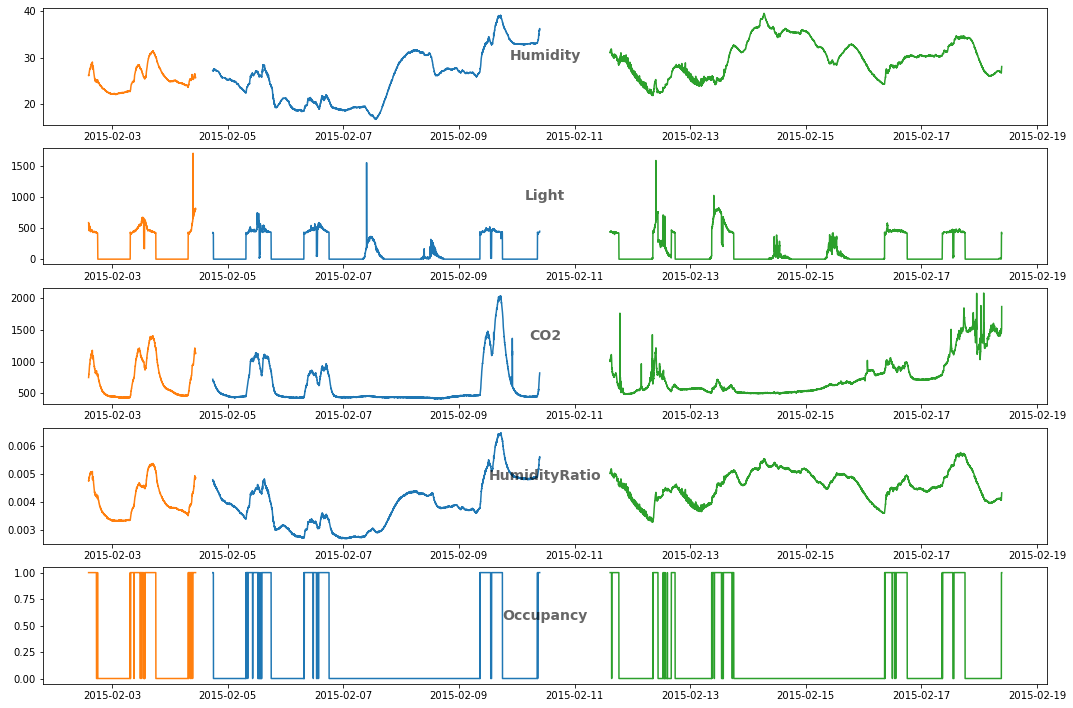

<Figure size 432x288 with 0 Axes>

In [132]:
plt.figure(figsize=(18,15))
for n in range(1, 6):
    plt.subplot(6, 1, n)
    plt.plot(df1.index, df1.values[:, n])
    plt.plot(df2.index, df2.values[:, n])
    plt.plot(df3.index, df3.values[:, n])
    plt.title(df1.columns[n], y=0.5, weight='bold', alpha=0.6, fontsize=14)
plt.show()
plt.tight_layout()

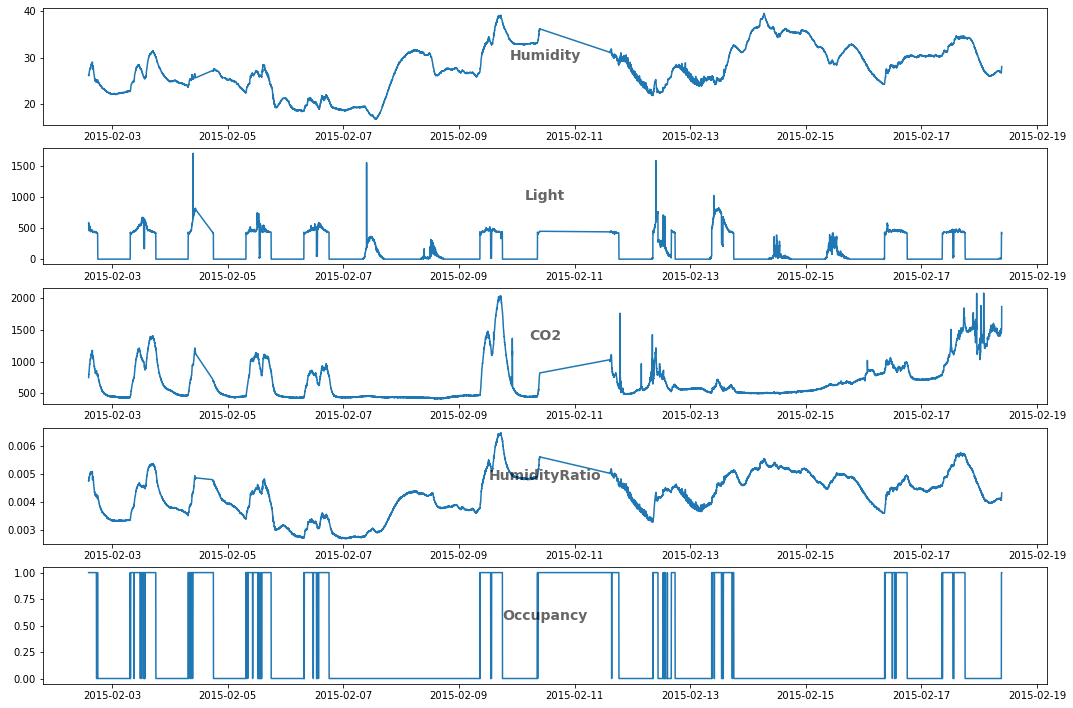

In [133]:
df = df.sort_index()
plt.figure(figsize=(18,15))
for n in range(1, 6):
    plt.subplot(6, 1, n)
    plt.plot(df.index, df.values[:, n])
    plt.title(df1.columns[n], 
              y=0.5, 
              weight='bold', 
              alpha=0.6, 
              fontsize=14)


In [134]:
df['Occupancy'].value_counts()

0    15810
1     4750
Name: Occupancy, dtype: int64

- There is definitely some class imbalance. However, lets give it a go for now

<AxesSubplot:>

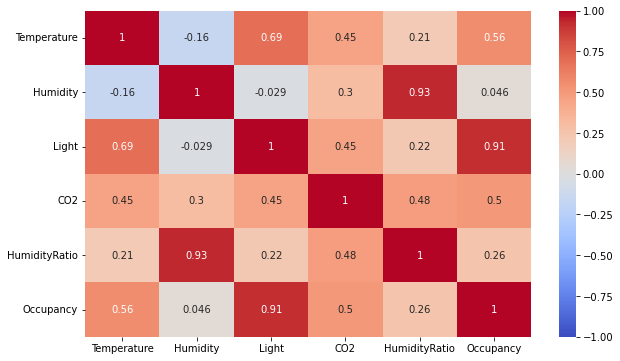

In [135]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

- There are a few features involved in MultiColinearity
1. `Humidity` and `HumidityRatio` are very colinear at around 0.90
2. `Light` and `Temperature` are also colinear at around 0.7
3. `Light` is extremely predictive for the target variable, `Occupancy` as well, whereas `Temperature` does not seem to be this close

I'd delete the `Humidity` to get data more in inline with Logistic Regression's assumptions

In [136]:
df = df.drop('Humidity', axis=1)

<AxesSubplot:>

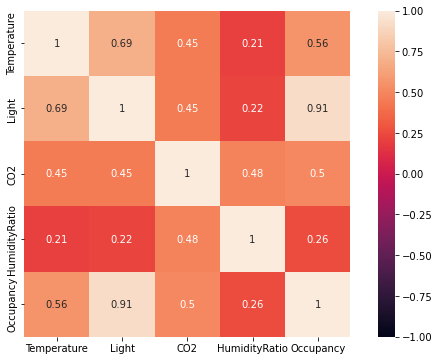

In [137]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), 
            annot=True, 
            vmin=-1, 
            vmax=1, 
            square=True, 
            cmap='rocket')

## Model
I will try to work on this problem with two of the most commonly used machine learning algorithms for classification problem
1. Logistic Regression
2. Random Forest Classifier

### Splitting the dataset

In [138]:
# Into features and labels
X = df.drop('Occupancy', axis=1).values
y = df['Occupancy'].values

In [139]:
# Into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=10)
# Further into train_val and val
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, 
                                                          y_train, 
                                                          test_size=0.3, 
                                                          random_state=1)

In [146]:
logreg = LogisticRegression()
logreg.fit(X_train_val, y_train_val)
y_val_pred = logreg.predict(X_val)
print('Test score: ',logreg.score(X_val, y_val))
print('Train score: ', logreg.score(X_train_val, y_train_val))
print(classification_report(y_val, y_val_pred))

Test score:  0.9895785085687818
Train score:  0.989775660115148
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3315
           1       0.96      0.99      0.98      1003

    accuracy                           0.99      4318
   macro avg       0.98      0.99      0.99      4318
weighted avg       0.99      0.99      0.99      4318



In [147]:
rf = RandomForestClassifier()
rf.fit(X_train_val, y_train_val)
y_val_pred = rf.predict(X_val)

print('Test score: ',rf.score(X_val, y_val))
print('Train score: ', rf.score(X_train_val, y_train_val))
print(classification_report(y_val, y_val_pred))

Test score:  0.9916628068550255
Train score:  1.0
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3315
           1       0.98      0.99      0.98      1003

    accuracy                           0.99      4318
   macro avg       0.99      0.99      0.99      4318
weighted avg       0.99      0.99      0.99      4318



- Although unscaled data is giving great results, I will try scaling as well to see if the performance remains the same or not

In [150]:
logreg_pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression())])
logreg_pipe.fit(X_train, y_train)
print('Validation Score: ',logreg_pipe.score(X_train_val, y_train_val))

Validation Score:  0.989775660115148


- It still gives the same performance. RandomForest doesn't require scaling